### EV353 Oceanography and Climate In-class Data Analysis Activity

**Equatorial wind stress and zonal ocean velocity**

The Simple Ocean Data Assimilation (SODA) Reanalysis is an ocean general circulation model that is constrained by observations through a process called data assimilation. Reanalysis products are useful tools because there are not observations for every location and time in the past. Essentially the gaps in observations are filled in with the model's physical equations.

The dataset `soda.nc` is needed for this activity. This NetCDF file includes only the full monthly zonal wind stress and zonal ocean velocity down to 200 m along the equator (averaged from 0.5°S to 0.5°N). 

----
**1. Open and display the zonal wind stress and zonal ocean velocity and meridional wind components using xarray**

Sample code provided below for you to modify:

```
# open dataset using xarray (soda.nc)
filePath = 'paste your filepath here'
ds = xr.open_dataset(filePath)

# display dataset
ds
```

**2. Calculate and plot the time-mean zonal wind stress $\tau_x$ and zonal ocean velocity $u$ along the equator**

Generate a depth vs. longitude cross-section of zonal ocean velocity (*Hint: Refer to PS#1 for sample code to make a filled contour plot*). Then generate a simple line plot of wind stress versus longitude. Identify the longitudes for the Pacific Ocean.

**3. Interpret your results!**

- What is the direction of the surface ocean current along the equator?
- Can you spot the Equatorial Undercurrent (EUC) beneath the surface?
- What is the depth of the EUC, and how does that depend on longitude?
- How does the Pacific EUC compare to any analogous circulation features in the equatorial Indian and Atlantic Ocean?

**4. Investigate $\tau_x$ and $u$ changes during El Niño events** 

Describe the changes in $\tau_x$ and the EUC during the peak of an El Niño event (e.g., January 1998) compared to the time-mean. This can be answered multiple ways so brainstorm some ideas with your classmates to help you visualize the results and answer the question. 

Add your observations in a Markdown cell and discuss them with your classmates.

In [1]:
# import Python packages
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cmocean
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
# open dataset using xarray (soda.nc)
filePath = '/Users/a_rust/Documents/EV353_Oceanography/soda.nc'
ds = xr.open_dataset(filePath)

# display dataset
ds

<xarray.Dataset>
Dimensions:  (time: 1656, depth: 14, lon: 720)
Coordinates:
  * time     (time) float64 1.871e+03 1.871e+03 ... 2.009e+03 2.009e+03
  * depth    (depth) float32 5.01 15.07 25.28 35.76 ... 129.5 149.0 171.4 197.8
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
Data variables:
    taux     (lon, time) float32 ...
    u        (depth, lon, time) float32 ...
Attributes:
    description:  Soda

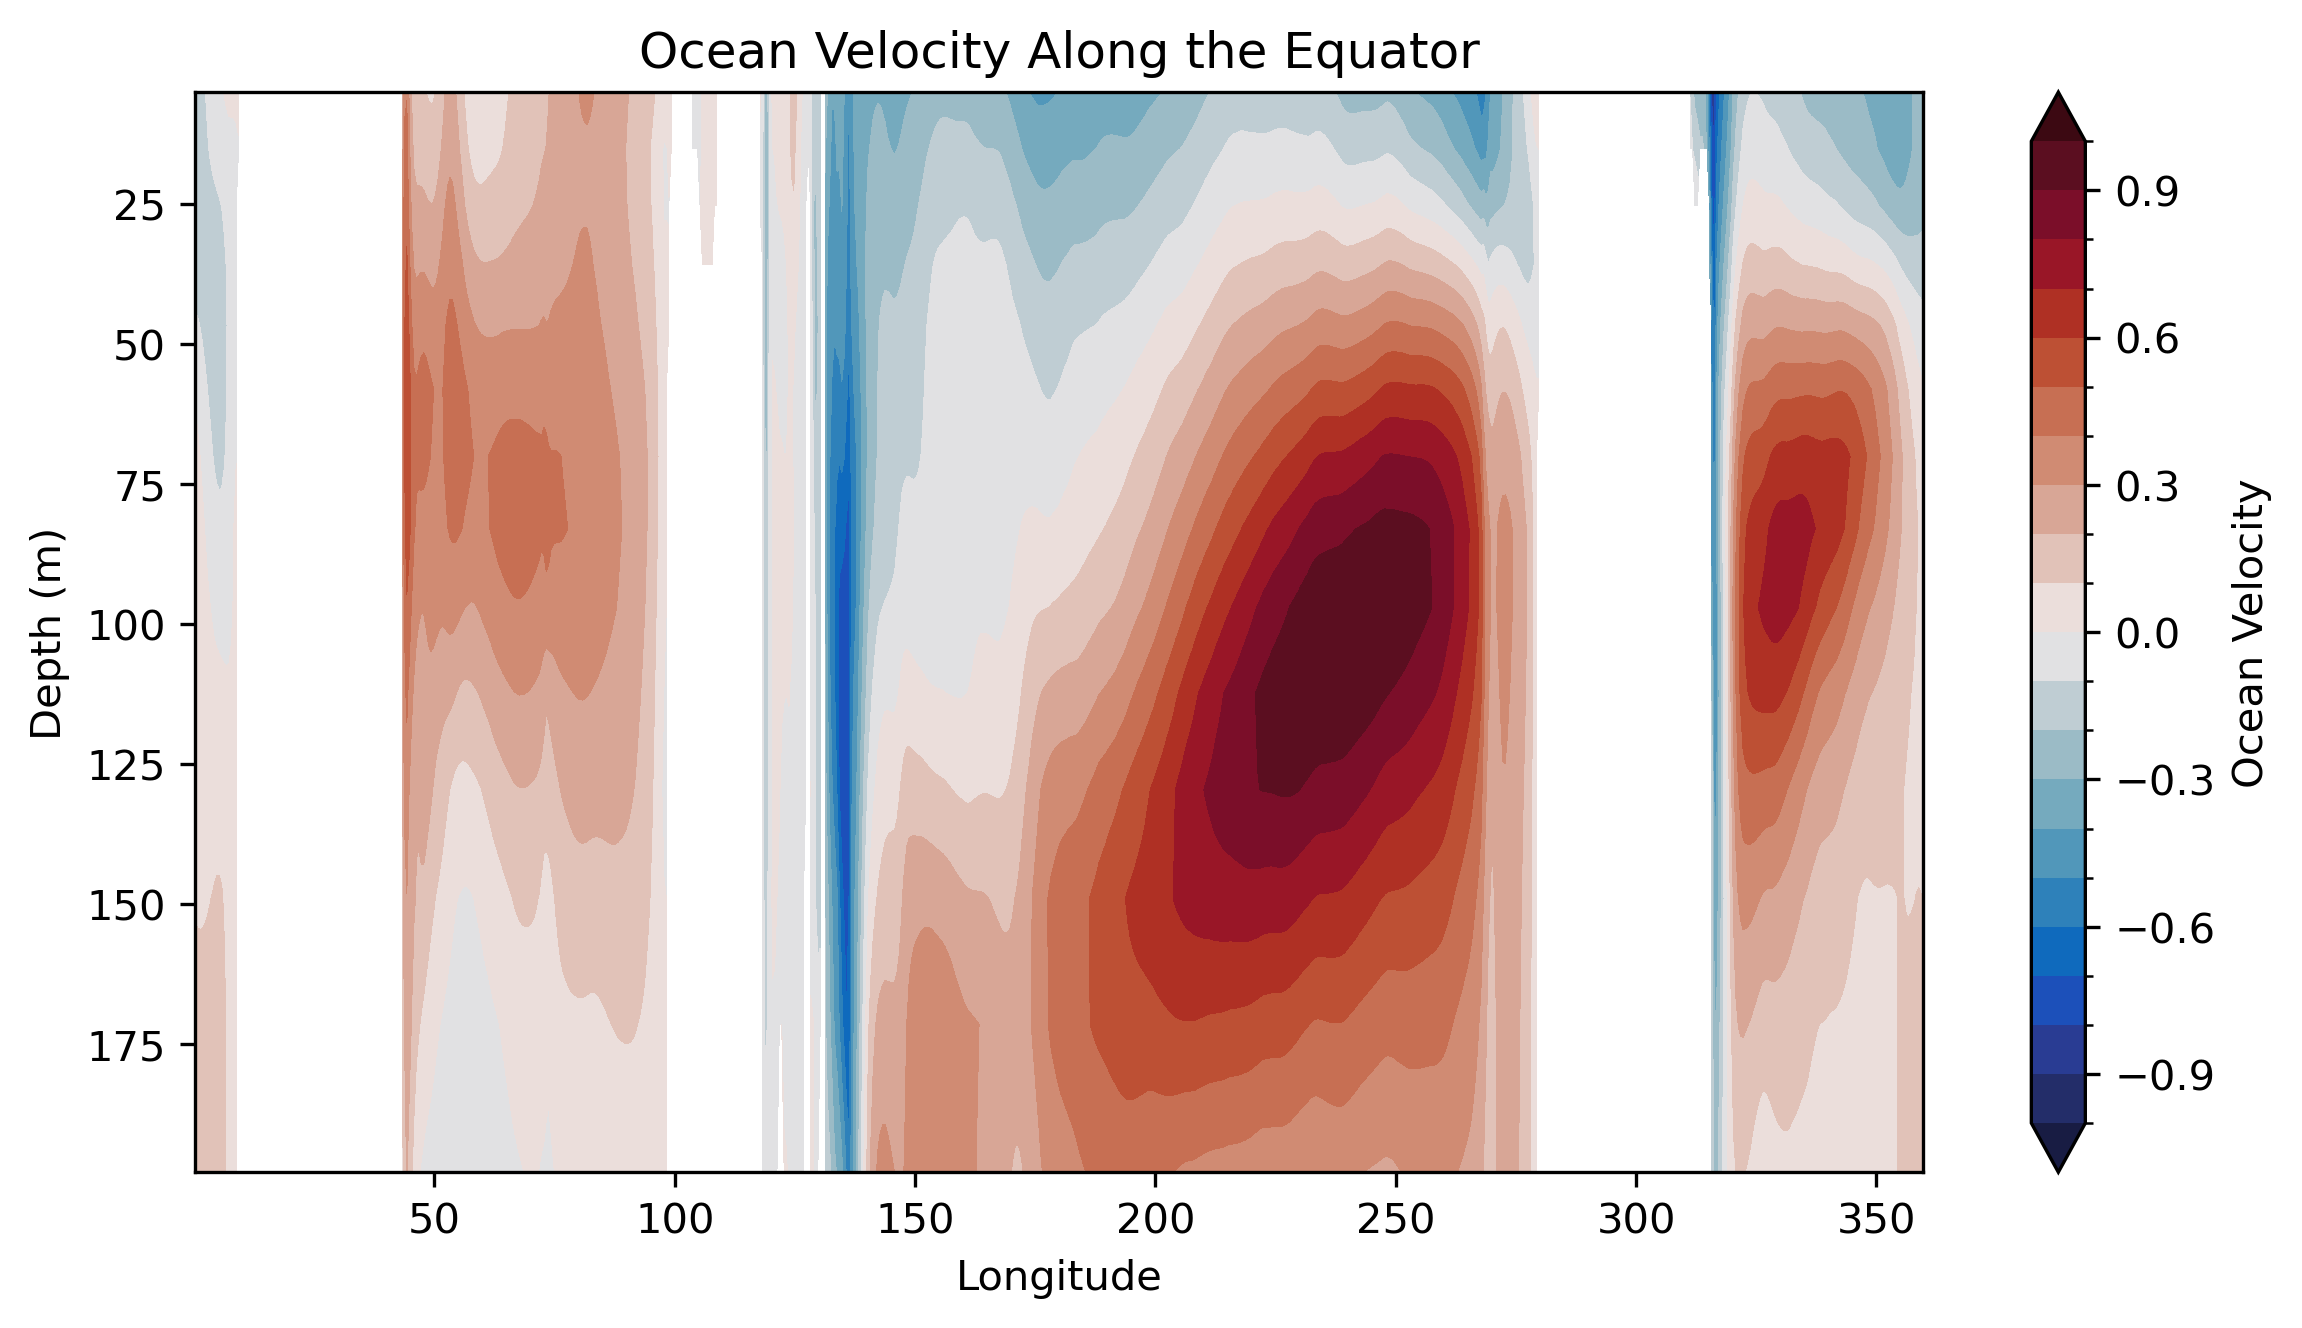

In [3]:
u = ds['u'].mean(dim='time')

cmap = cmocean.cm.balance
fig = plt.figure(figsize=(9, 4.5), dpi=300)
lev = np.arange(-1, 1.1, 0.1)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) 

u.plot.contourf(
    x='lon',
    y='depth',
    ax=ax,
    levels=lev,
    extend='both',
    cmap=cmap,
    cbar_kwargs={'label': "Ocean Velocity"}
)

ax.invert_yaxis()
ax.set_title("Ocean Velocity Along the Equator")
ax.set_xlabel("Longitude")
ax.set_ylabel("Depth (m)")

fig.savefig('tao_mean_temp_cross_section.png', facecolor = 'white', transparent = False, bbox_inches ='tight')

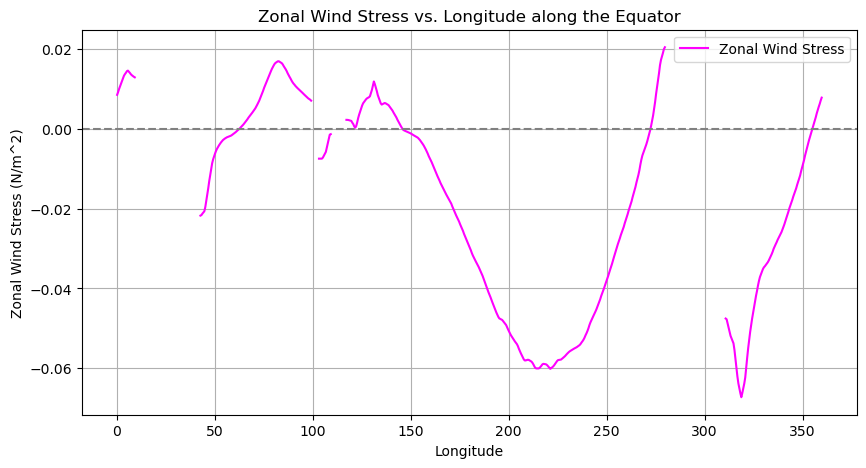

In [31]:
taux = ds['taux'].mean(dim='time')

plt.figure(figsize=(10, 5))
plt.plot(ds['lon'], taux, color='magenta', label='Zonal Wind Stress')

plt.title('Zonal Wind Stress vs. Longitude along the Equator')
plt.xlabel('Longitude')
plt.ylabel('Zonal Wind Stress (N/m^2)')
plt.grid(True)
plt.legend()
plt.axhline(y=0, color='gray', linestyle='--')

plt.savefig('zonal equatorial wind stress.png', dpi=300, bbox_inches='tight')

plt.show()


3. Interpret your results!
What is the direction of the surface ocean current along the equator?
east to west (negative)

Can you spot the Equatorial Undercurrent (EUC) beneath the surface?
positive (red color), indicating west to east motion.

What is the depth of the EUC, and how does that depend on longitude?
The  EUC is ~50m and below. This depends on longitude because the depth of the ML changes with respect to longitude.  for instance, at ~220 longitude zonal wind stress is high, causing a deeper ML and thus shifting the EUC downward in depth.

How does the Pacific EUC compare to any analogous circulation features in the equatorial Indian and Atlantic Ocean?
The EUC is much stronger than its counterparts in the Indian and Atlantic basins.

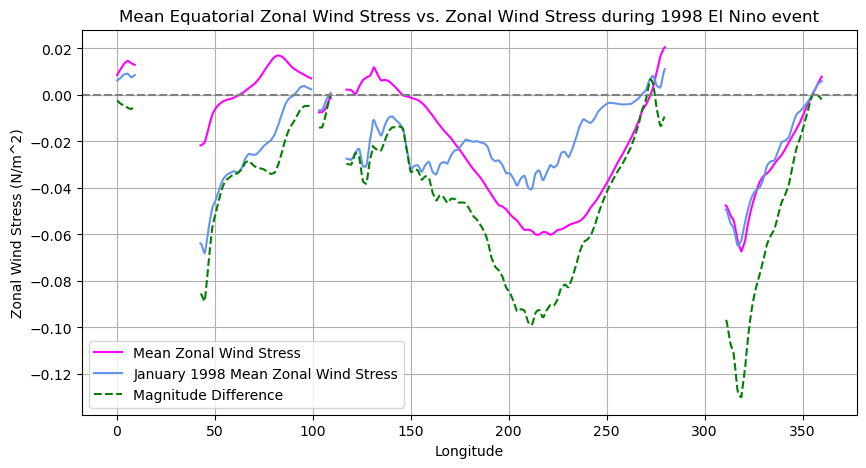

In [30]:
nino = ds.sel(time=slice('1998.000000', '1998.08493'))
nino_taux = nino['taux'].mean(dim='time')
diff_taux = nino_taux - taux

plt.figure(figsize=(10, 5))
plt.plot(ds['lon'], taux, color='magenta', label='Time-mean (1871-2008)')
plt.plot(ds['lon'], nino_taux, color= 'cornflowerblue', label='Peak El-Nino (January 1998)')
plt.plot(ds['lon'], diff_taux, color='green', label='Magnitude Difference', linestyle='--')

plt.title('Mean Equatorial Zonal Wind Stress vs. Zonal Wind Stress during 1998 El Nino event')
plt.xlabel('Longitude')
plt.ylabel('Zonal Wind Stress (N/m^2)')
plt.grid(True)
plt.legend()
plt.axhline(y=0, color='gray', linestyle='--')

plt.savefig('Zonal Wind Stress Difference.png', dpi=300, bbox_inches='tight')

plt.show()



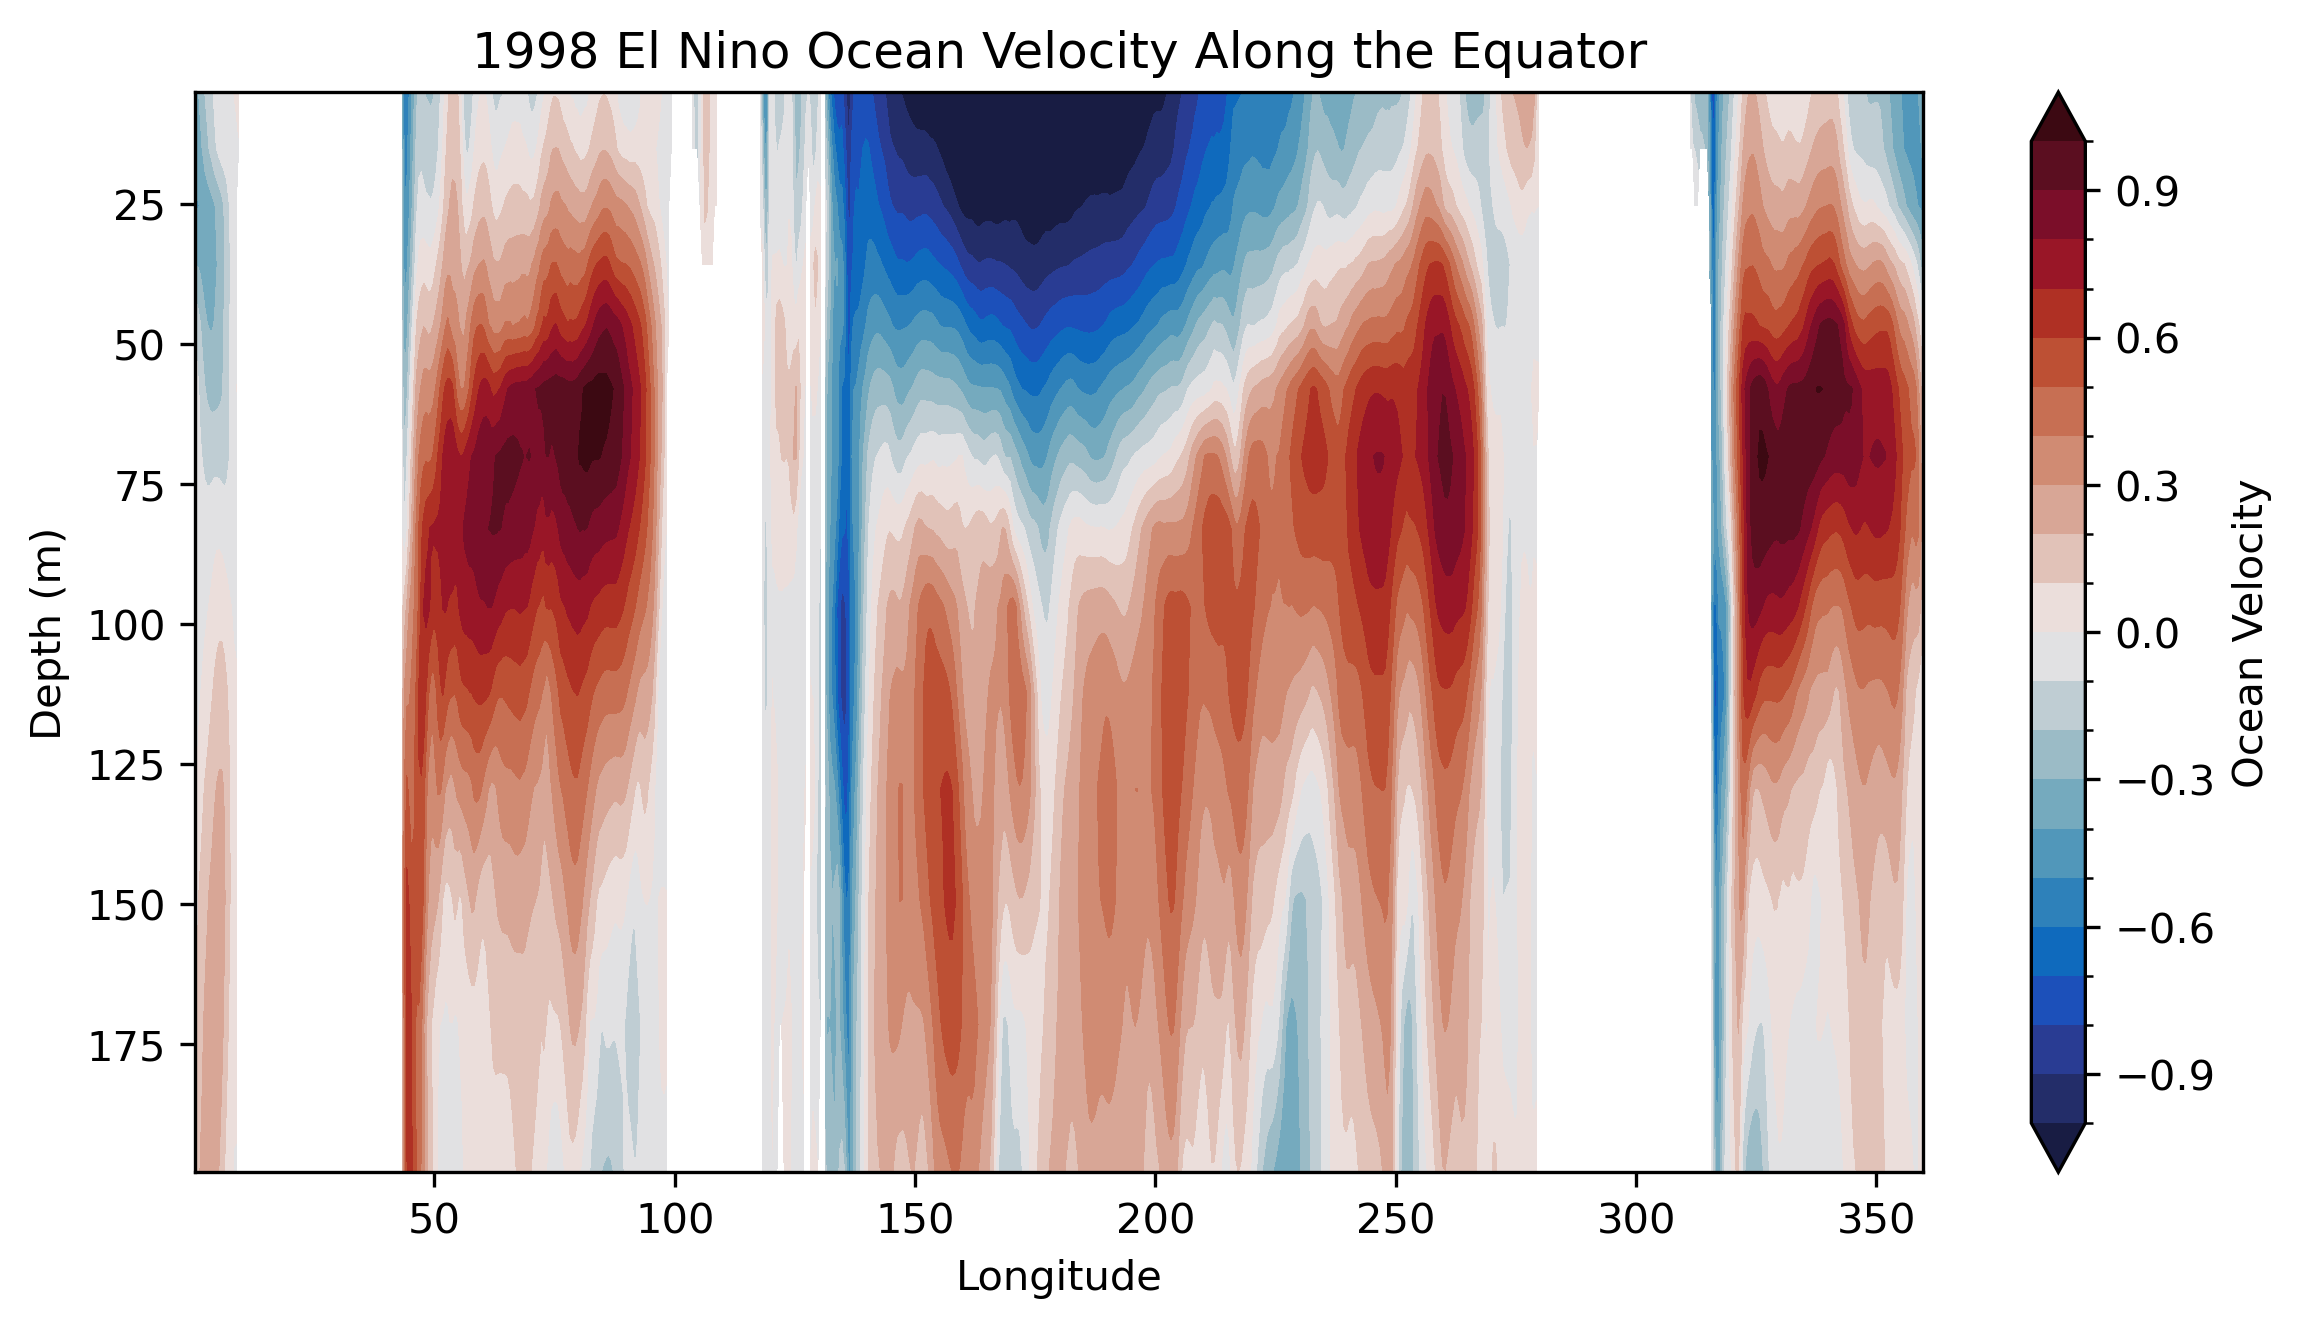

In [19]:
nino_u = nino['u'].mean(dim='time')

cmap = cmocean.cm.balance
fig = plt.figure(figsize=(9, 4.5), dpi=300)
lev = np.arange(-1, 1.1, 0.1)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) 

nino_u.plot.contourf(
    x='lon',
    y='depth',
    ax=ax,
    levels=lev,
    extend='both',
    cmap=cmap,
    cbar_kwargs={'label': "Ocean Velocity, u (m/s)"}
)

ax.invert_yaxis()
ax.set_title("1998 El Nino Ocean Velocity Along the Equator")
ax.set_xlabel("Longitude")
ax.set_ylabel("Depth (m)")

fig.savefig('tao_mean_temp_cross_section.png', facecolor = 'white', transparent = False, bbox_inches ='tight')


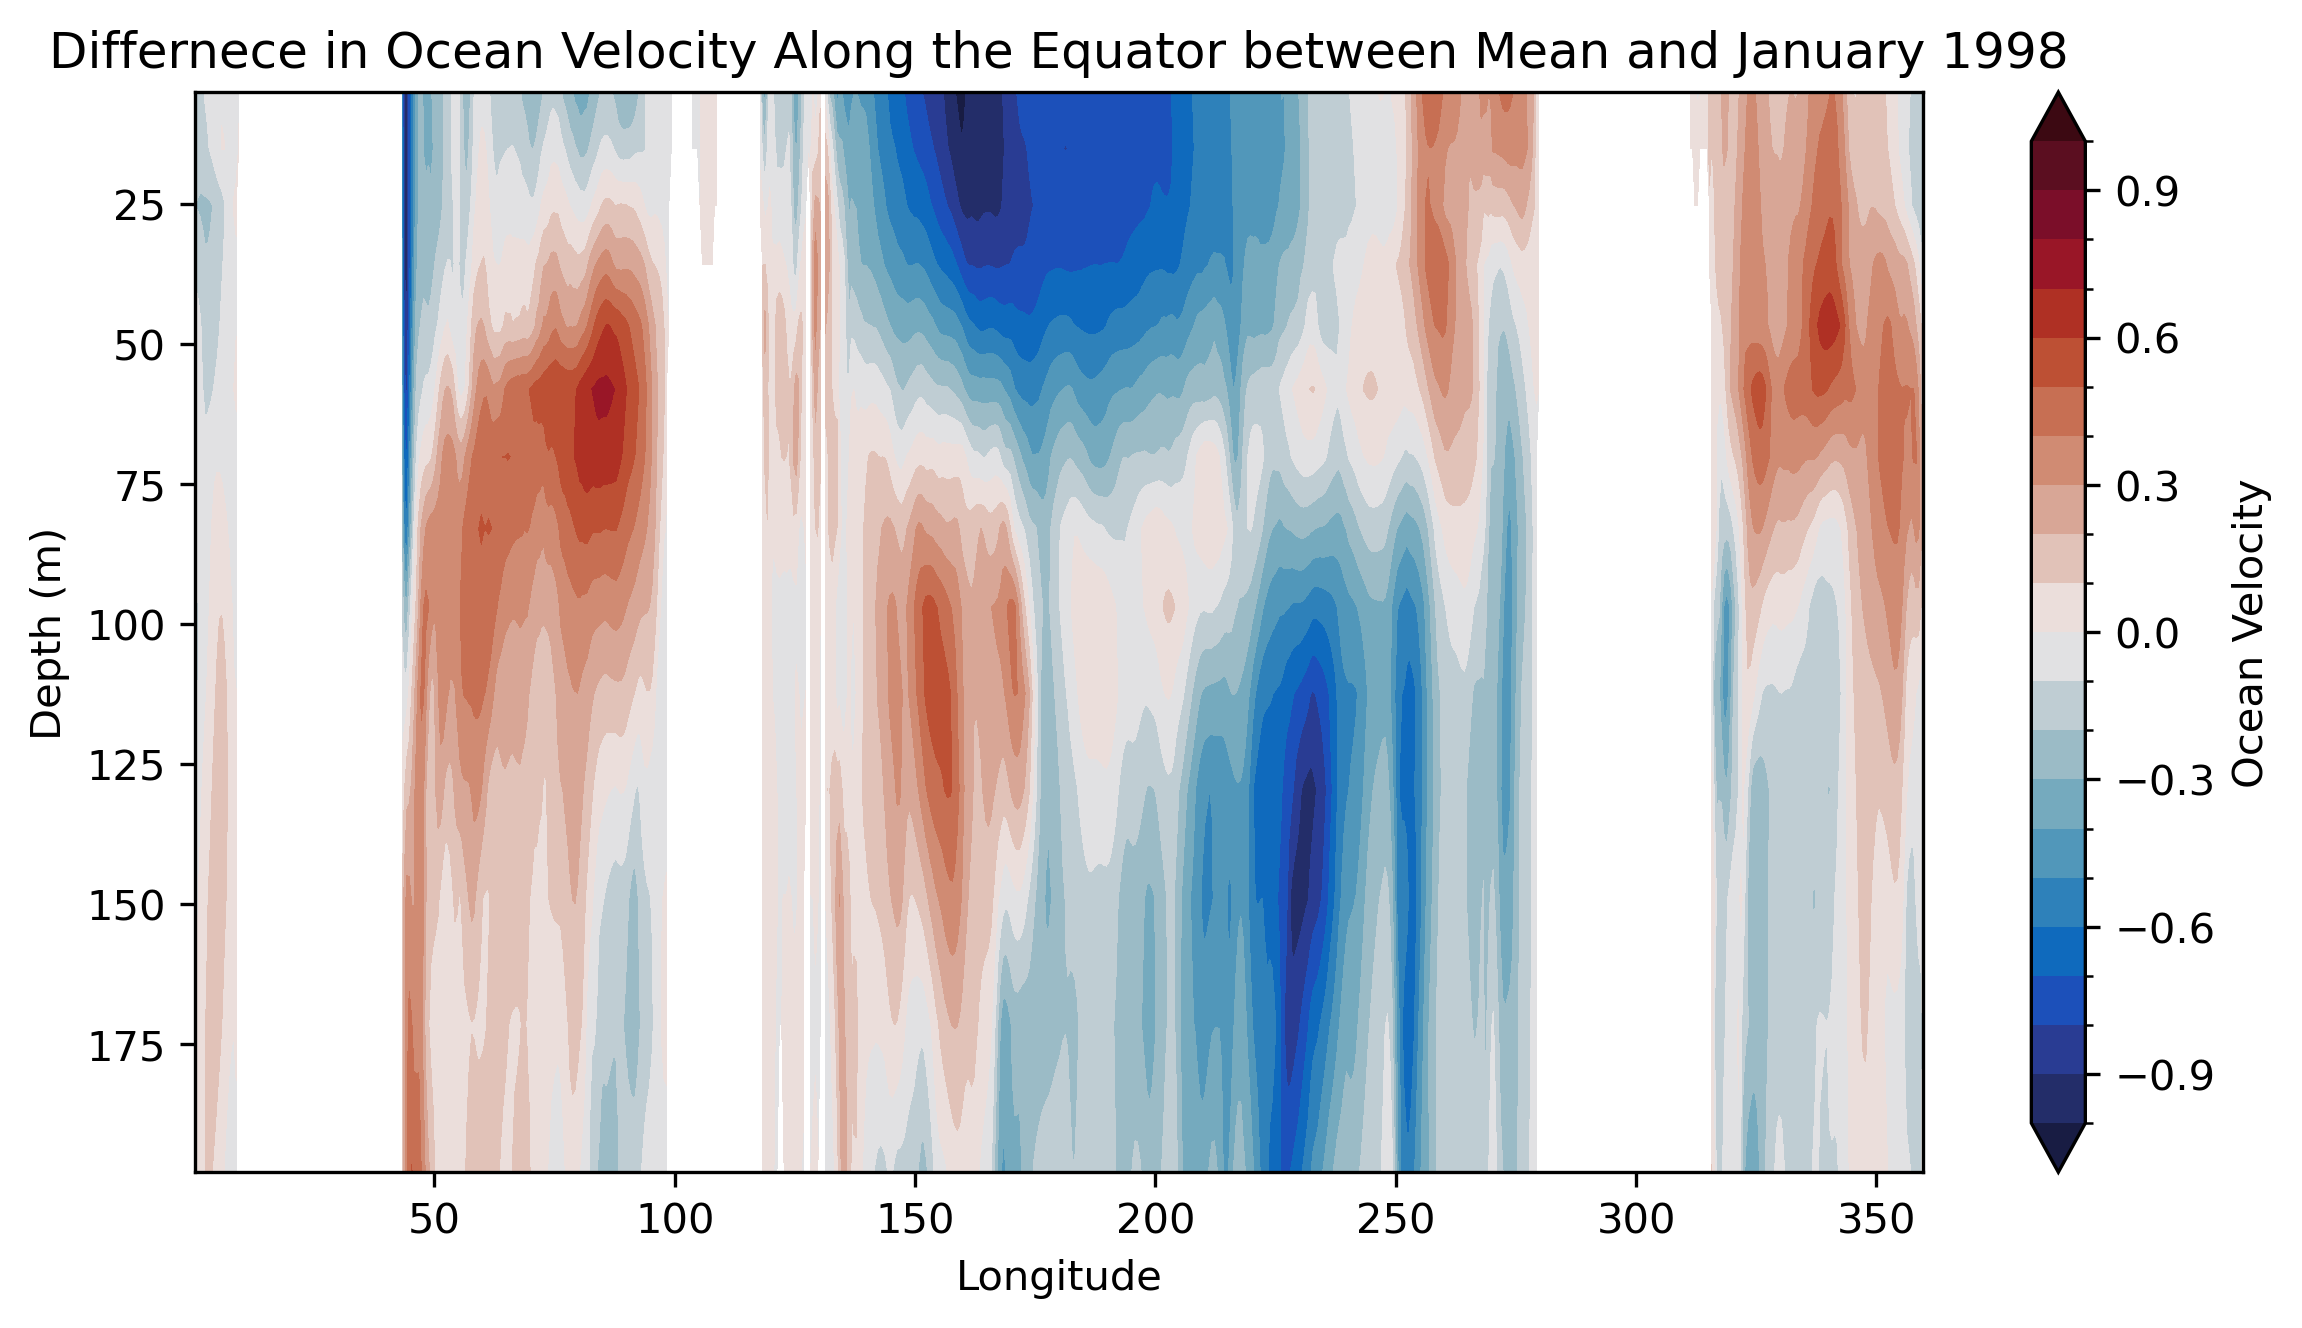

In [20]:
diff_u = nino_u - u

cmap = cmocean.cm.balance
fig = plt.figure(figsize=(9, 4.5), dpi=300)
lev = np.arange(-1, 1.1, 0.1)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) 

diff_u.plot.contourf(
    x='lon',
    y='depth',
    ax=ax,
    levels=lev,
    extend='both',
    cmap=cmap,
    cbar_kwargs={'label': "Ocean Velocity, u (m/s)"}
)

ax.invert_yaxis()
ax.set_title("Differnece in Ocean Velocity Along the Equator between Mean and January 1998")
ax.set_xlabel("Longitude")
ax.set_ylabel("Depth (m)")

fig.savefig('tao_mean_temp_cross_section.png', facecolor = 'white', transparent = False, bbox_inches ='tight')


Observations: 
- The magnitude of January 1998 Wind Stress, taux, and the ocean velocity, u,  is generally weaker. This can be seen by the higher taux values in the line plot and the mostly blue shading in the ocean velocity cross section.
- 